# Website Analysis Performance Project

In [36]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


# Read Dataset

In [37]:
# Load the dataset
data = pd.read_csv("data-export (1).csv")

In [38]:
data

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [39]:
data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Data Cleaning and Systematic

In [40]:
# set first row as header and show first 5 rows
data.columns = data.iloc[0]
# Remove the first row (already used as header) and reset the index numbers 
data = data.drop(index= 0).reset_index(drop= True)
# rename all columns with clear and meaningful names for better readability
data.columns = ["Channel group", "Date + Hour", "Users", "Sessions", "Engaged sessions", "Average engagement time per session", 
                "Engaged sessions per user", "Events per session", "Engagement rate", "Event coun"]

In [41]:
# Display the fiest 5 rows of the dataframe (with new headers) 
data.head()

,Channel group,Date + Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event coun
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [42]:
# Convert 'Date + Hour' to datetime format and numeric columns to appropriate data types
data["Date + Hour"] = pd.to_datetime(data["Date + Hour"], format="%Y%m%d%H", errors= 'coerce')
numeric_cols = data.columns.drop(["Channel group", "Date + Hour"]) # Identify numerical columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
data["Hour"] = data["Date + Hour"].dt.hour # Extract hour from 'Date + Hour' for hourly analysis

In [44]:
data.info() # check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   Date + Hour                          3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event coun                           3182 non-null   int64         
 10  Hour        

In [9]:
data.head()

,Channel group,Date + Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event coun,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [45]:
data.describe() # get statistical summary of numerical columns

,Date + Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event coun,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


case 1 :
What patterns or trends can be identified in website sessions and users over time?

# Session and User Trends Over Time Analysis

In [26]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

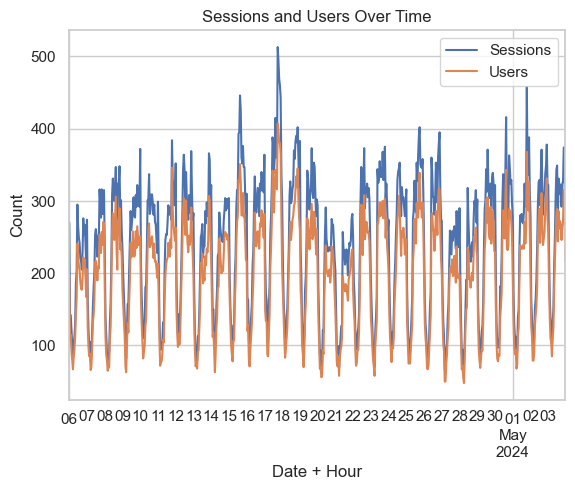

In [27]:
# Plot sessions and users over time
plt.Figure(figsize=(12, 6))
data.groupby("Date + Hour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("Date + Hour")
plt.ylabel("Count")
plt.show()

case 2 :
Which marketing channels brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources? 

# Total Users by Channel Analysis

C:\Users\RUDRA BARMAN\AppData\Local\Temp\ipykernel_25680\118345537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Channel group", y="Users", estimator=np.sum, palette="viridis")


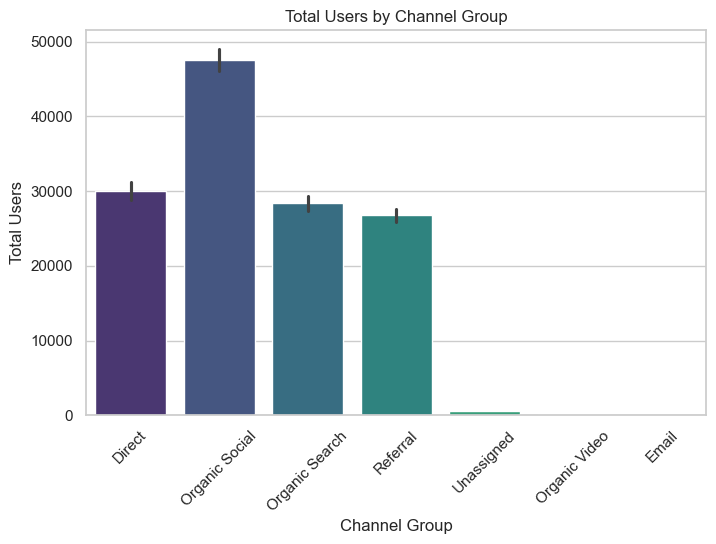

In [ ]:
# Plot total users by channel group
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Total Users")
plt.xticks(rotation=45)
plt.show()

--> **Organic Social** channel brought the highest number of users to the website. To improve traffic from other sources, we can focus on enhancing our SEO strategies for Organic Search, optimizing paid campaigns for Paid Search, and increasing engagement on Referral channels.

case 3 :
Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness on the website?

# Average Engagement Time by Channel Analysis

C:\Users\RUDRA BARMAN\AppData\Local\Temp\ipykernel_25680\3796521615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Channel group", y="Average engagement time per session", estimator=np.mean, palette="magma") # Create bar plot


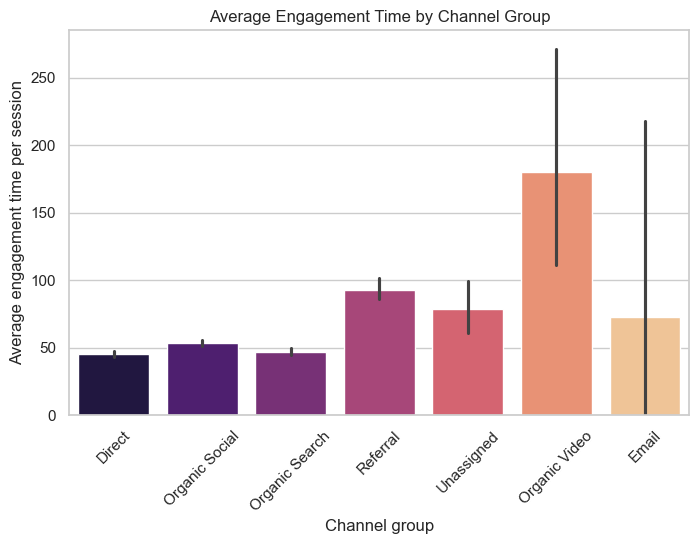

In [ ]:
plt.figure(figsize=(8, 5)) 
sns.barplot(data=data, x="Channel group", y="Average engagement time per session", estimator=np.mean, palette="magma") # Create bar plot
plt.title("Average Engagement Time by Channel Group")
plt.xlabel("Channel group")
plt.ylabel("Average engagement time per session")
plt.xticks(rotation=45)
plt.show()

--> **Organic video** channel has the highest average engagement time, indicating that users find video content more engaging and are likely to spend more time interacting with it. This suggests that investing in high-quality video content could enhance user experience and retention on the website.

case 4 :
How does engagement rate vary across different traffic channels?

# Engagement rate distribution by channel analysis

C:\Users\RUDRA BARMAN\AppData\Local\Temp\ipykernel_25680\1168279926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Channel group", y="Engagement rate", palette="coolwarm") # create boxplot


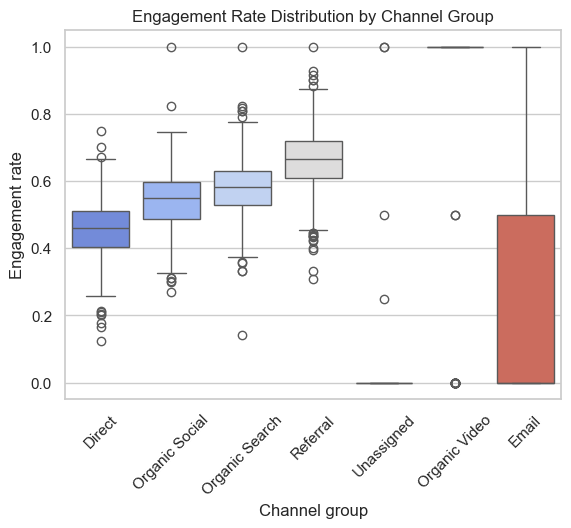

In [55]:
# Engagement rate distribution by channel analysis
plt.Figure(figsize=(8, 5)) # set figure size
sns.boxplot(data=data, x="Channel group", y="Engagement rate", palette="coolwarm") # create boxplot
plt.title("Engagement Rate Distribution by Channel Group") 
plt.xlabel("Channel group")
plt.ylabel("Engagement rate")
plt.xticks(rotation=45) #rotate x-axis labels for better readability
plt.show()

--> **Referral** channel shows the highest engagement rate, suggesting that users coming from referral sources are more engaged with the website content. This indicates that building strong parterships and encouraging referrals could be an effective strategy to boost overall engagement on the site.

case 5 :
Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can be implemented to enhance engagement in underperforming channels?

# Engaged vs Non-Engaged Sessions by Channel Analysis

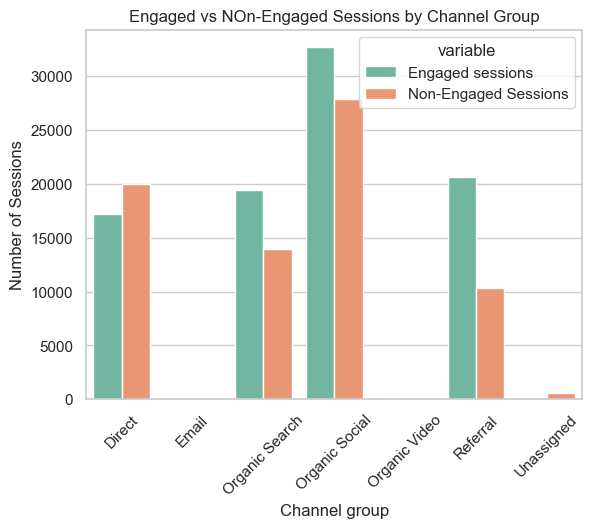

In [61]:
session_data = data.groupby("Channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_data["Non-Engaged Sessions"] = session_data["Sessions"] - session_data["Engaged sessions"]
session_data_melted = session_data.melt(id_vars="Channel group", value_vars=["Engaged sessions", "Non-Engaged Sessions"])

plt.Figure(figsize=(8, 5))
sns.barplot(data=session_data_melted, x="Channel group", y="value", hue="variable", palette="Set2")
plt.title("Engaged vs NOn-Engaged Sessions by Channel Group")
plt.xlabel("Channel group")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.show()

--> **Organic Social** channel has the highest number of engaged sessions, and Non-engaged sessions are significantly lower compared to other channels. To enhance engagement in underperforming channels like Direct, we can implement targeted content strategies, personalized user experiences, and optimize landing pages to better capture user interest and encourage interaction.

case 6 :
At what hours of the day does each channel drive the most traffic?

# Traffic by Hour and Channel Analysis

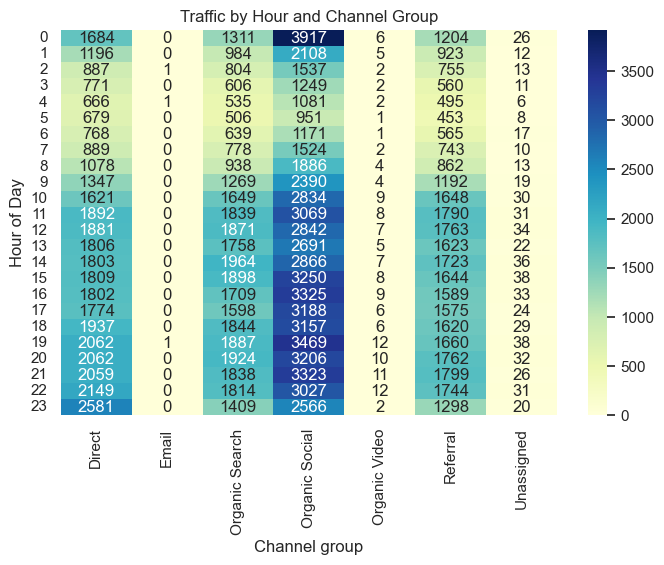

In [ ]:
heatmap_data = data.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0) # Prepare data for heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel Group")
plt.xlabel("Channel group")
plt.ylabel("Hour of Day")
plt.show()

case 7 :
Is there any correlation between high traffic (sessions) and high engagement rate over time?

# Engagement Rate vs Sessions Over Time Analysis

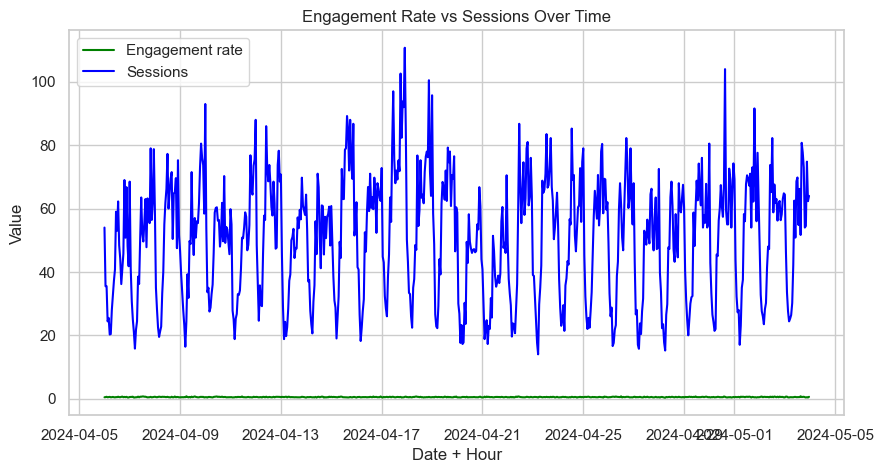

In [68]:
data_plot = data.groupby("Date + Hour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(data_plot["Date + Hour"], data_plot["Engagement rate"], label="Engagement rate", color="Green")
plt.plot(data_plot["Date + Hour"], data_plot["Sessions"], label="Sessions", color="Blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("Date + Hour")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# End 